In [4]:
import subprocess as sp
import time
import h5py
import pandas as pd

In [5]:
import numpy as np

In [6]:
i = 30
h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_gold_BPZ_input_{i:03}.h5'

In [7]:
f = h5py.File(h5dir)

In [8]:
np.array(f['df/block0_values'])[:,8]

array([22.37615827, 20.68849449, 22.71483819, ..., 20.6498866 ,
       21.41730029, 21.70957141])

In [9]:
np.array(f['df/block1_values']).flatten()

array([7041931963, 7041931967, 7041931972, ..., 7199697775, 7199697778,
       7199697784])

In [10]:
df = pd.DataFrame()
df['COADD_OBJECT_ID'] = np.array(f['df/block1_values']).flatten()
for i, key in enumerate(list(f['df/block0_items'])):
    df[key] = np.array(f['df/block0_values'])[:,i]

In [19]:
(df[b'BDF_FLUX_I']<0).sum()

65

In [12]:
import matplotlib.pyplot as plt

In [20]:
np.isnan(df[b'BDF_MAG_I']).sum()

65

(array([4.00000e+00, 2.00000e+01, 3.63800e+03, 3.38680e+04, 1.25688e+05,
        2.64458e+05, 4.57150e+04, 2.80000e+01, 8.00000e+00, 1.00000e+00]),
 array([13.65000938, 15.19894068, 16.74787197, 18.29680326, 19.84573456,
        21.39466585, 22.94359715, 24.49252844, 26.04145973, 27.59039103,
        29.13932232]),
 <BarContainer object of 10 artists>)

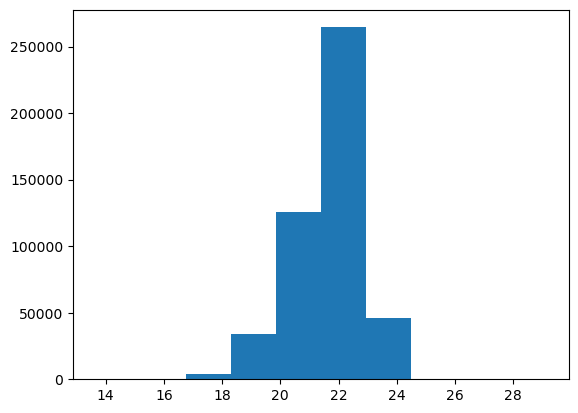

In [27]:
plt.hist(df[b'BDF_MAG_I'])

In [3]:
with h5py.File(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_gold_BPZ_input_001.h5') as f:
    print(len(f['df/block1_values']))


473493


In [21]:
start_time = time.time()
for i in range(1,401):
    if i%20==0: print(f'{i:03}')
    h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_gold_BPZ_input_{i:03}.h5' 
    
    lines = ['#!/bin/sh', '#SBATCH -t 3:00:00',
             '#SBATCH --partition=broadwl',
             '#SBATCH --account=pi-chihway',
             f'#SBATCH --job-name=BPZ{i:03}',
             '#SBATCH --nodes=1',
             '#SBATCH --ntasks-per-node=28', 
             f'python -u /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py '\
           + h5dir + f' -P /home/raulteixeira/repos/DESC_BPZ/tests/DELVE_metacal_gold_bdf_hdfn_cwwsb4_{i:03}.pars',
             'echo "end"']

    lines = [l + '\n' for l in lines]

    bash_job_path = f'/home/raulteixeira/jobs/bpz_bdf_will_hdfn/bpz_BDF_HDFN_{i:03}_mcal_gold.sh'
    pars = open(bash_job_path, mode='w')
    pars.writelines(lines)
    pars.close()

    sp.run(f'sbatch {bash_job_path}', shell = True)

print(time.time()-start_time)

Submitted batch job 28120832
Submitted batch job 28120833
Submitted batch job 28120834
Submitted batch job 28120835
Submitted batch job 28120836
Submitted batch job 28120837
Submitted batch job 28120838
Submitted batch job 28120839
Submitted batch job 28120840
Submitted batch job 28120841
Submitted batch job 28120842
Submitted batch job 28120843
Submitted batch job 28120844
Submitted batch job 28120845
Submitted batch job 28120846
Submitted batch job 28120847
Submitted batch job 28120848
Submitted batch job 28120849
Submitted batch job 28120850
020
Submitted batch job 28120852
Submitted batch job 28120853
Submitted batch job 28120854
Submitted batch job 28120855
Submitted batch job 28120856
Submitted batch job 28120858
Submitted batch job 28120859
Submitted batch job 28120860
Submitted batch job 28120861
Submitted batch job 28120862
Submitted batch job 28120864
Submitted batch job 28120865
Submitted batch job 28120867
Submitted batch job 28120868
Submitted batch job 28120869
Submitted 

Submitted batch job 28121131
Submitted batch job 28121132
Submitted batch job 28121133
Submitted batch job 28121134
Submitted batch job 28121135
Submitted batch job 28121136
Submitted batch job 28121137
Submitted batch job 28121138
Submitted batch job 28121139
Submitted batch job 28121140
Submitted batch job 28121141
Submitted batch job 28121142
Submitted batch job 28121143
Submitted batch job 28121144
Submitted batch job 28121145
Submitted batch job 28121146
Submitted batch job 28121147
Submitted batch job 28121148
300
Submitted batch job 28121149
Submitted batch job 28121150
Submitted batch job 28121151
Submitted batch job 28121152
Submitted batch job 28121153
Submitted batch job 28121154
Submitted batch job 28121155
Submitted batch job 28121156
Submitted batch job 28121157
Submitted batch job 28121158
Submitted batch job 28121159
Submitted batch job 28121160
Submitted batch job 28121161
Submitted batch job 28121163
Submitted batch job 28121164
Submitted batch job 28121165
Submitted 

In [19]:
N=int(2e5)
start_time = time.time()
for i in range(1,50):
    h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_{i:02}.h5' 
    #h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_{i:02}.h5'
#     df = pd.read_hdf(h5dir)
#     df = df[:N]
#     print(df)
#     h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_.h5'
#    df.to_hdf(h5dir, key='df')
    
    lines = ['#!/bin/sh', '#SBATCH -t 20:00:00',
             '#SBATCH --partition=broadwl',
             '#SBATCH --account=pi-chihway',
             f'#SBATCH --job-name=BPZ{i:02}',
             '#SBATCH --nodes=1',
             '#SBATCH --ntasks-per-node=28', 
             f'python -u /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py '\
           + h5dir + f' -P /home/raulteixeira/repos/DESC_BPZ/tests/TEMP_bdf_hdfn_cwwsb4_{i:02}_v2.pars',
             'echo "end"']

    lines = [l + '\n' for l in lines]

    bash_job_path = f'/home/raulteixeira/jobs/bpz_bdf_will_hdfn/bpz_BDF_HDFN_{i:02}_v2.sh'
    pars = open(bash_job_path, mode='w')
    pars.writelines(lines)
    pars.close()

    sp.run(f'sbatch {bash_job_path}', shell = True)

    print(time.time()-start_time)

Submitted batch job 27679219
0.27770233154296875
Submitted batch job 27679221
0.366504430770874
Submitted batch job 27679222
0.4552755355834961
Submitted batch job 27679224
0.5342073440551758
Submitted batch job 27679225
0.6260979175567627
Submitted batch job 27679227
0.7143843173980713
Submitted batch job 27679228
0.8069612979888916
Submitted batch job 27679230
0.8964579105377197
Submitted batch job 27679232
1.081209421157837
Submitted batch job 27679233
1.1751289367675781
Submitted batch job 27679234
1.2603676319122314
Submitted batch job 27679236
1.352325439453125
Submitted batch job 27679238
1.4419937133789062
Submitted batch job 27679239
1.5237653255462646
Submitted batch job 27679240
1.5992255210876465
Submitted batch job 27679241
1.6818795204162598
Submitted batch job 27679242
1.7591643333435059
Submitted batch job 27679243
1.8455579280853271
Submitted batch job 27679244
1.92411470413208
Submitted batch job 27679245
2.0109429359436035
Submitted batch job 27679246
2.0857462882995

In [13]:
i=1
h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_{i:02}.h5'
df = pd.read_hdf(h5dir)

In [16]:
df[:50000].to_hdf(f'/project2/chihway/raulteixeira/data/bdf_photometry/test_dr3_1_1_bdf_metacal_cut_BPZ_input_5e4.h5', key='df')

In [11]:
!cp /home/raulteixeira/repos/DESC_BPZ/tests/TEMP_bdf_hdfn_cwwsb4_01.pars /home/raulteixeira/repos/DESC_BPZ/tests/TEST_bdf_hdfn_cwwsb4_01.pars

In [1]:
i=1

print(f'python -u /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py '\
           + f'/project2/chihway/raulteixeira/data/bdf_photometry/TEST_dr3_1_1_bdf_metacal_cut_BPZ_input_1e4.h5' + f' -P /home/raulteixeira/repos/DESC_BPZ/tests/TEST_bdf_hdfn_cwwsb4_1e4.pars')

python -u /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py /project2/chihway/raulteixeira/data/bdf_photometry/TEST_dr3_1_1_bdf_metacal_cut_BPZ_input_1e4.h5 -P /home/raulteixeira/repos/DESC_BPZ/tests/TEST_bdf_hdfn_cwwsb4_1e4.pars


In [18]:
print(lines[-2])

python /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py /project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01_2e5.h5 -P /home/raulteixeira/repos/DESC_BPZ/tests/TEMP_bdf_hdfn_cwwsb4_6_will_01_2e5.pars



In [19]:
!python /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py /project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01_2e5.h5 -P /home/raulteixeira/repos/DESC_BPZ/tests/TEMP_bdf_hdfn_cwwsb4_6_will_01_2e5.pars


Current time  Tue May 23 12:30:42 2023

RAUL'S VERSION
chunksize: 10000

!!!!
F_OBS:  [[  478.91807849   870.0108006   1813.98691787  2611.73487155]
 [  118.312244    1888.8692327   4131.36873037  6558.44466247]
 [ 1499.04049086  3260.76774885  6992.82680979 10270.12938488]
 ...
 [ 1240.40720229  3624.82494101  5982.29615304  8518.18737345]
 [  455.76071188   763.10120074   646.48697699   851.12371929]
 [  719.68074334  1756.88823051  2655.55816165  2953.02929038]] (200000, 4)

!!!!!
 EF_OBS [[212.56419068 174.5271462  262.43408677 439.03570429]
 [181.56635499 137.846376   186.0143622  330.89197315]
 [186.18530458 146.26863695 212.11914165 357.28884407]
 ...
 [ 23.72188469  46.1547728  118.18796031 135.60801052]
 [ 22.29312758  46.64707618  77.77033647 101.51062194]
 [ 23.7281307   43.90796963 111.77019041 128.44956233]] (200000, 4)
pars.d['MAG']: no
m0column name:  BDF_MAG_I
BDF_MAG_I
21.8534146232846
final length of trimmed dataset: 200000
ng larger than chunksize, creating first ch

In [ ]:
f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01_1e5.h5'

In [3]:
    h5dir = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_{i:02}.h5'
df = pd.read_hdf(h5dir)

In [4]:
df

,COADD_OBJECT_ID,BDF_FLUX_G,BDF_FLUX_R,BDF_FLUX_I,BDF_FLUX_Z,BDF_FLUX_ERR_G,BDF_FLUX_ERR_R,BDF_FLUX_ERR_I,BDF_FLUX_ERR_Z,BDF_MAG_I
1128534,6895874367,478.918078,870.010801,1813.986918,2611.734872,212.564191,174.527146,262.434087,439.035704,21.853415
1127482,6895874893,118.312244,1888.869233,4131.368730,6558.444662,181.566355,137.846376,186.014362,330.891973,20.959765
1127489,6895876258,1499.040491,3260.767749,6992.826810,10270.129385,186.185305,146.268637,212.119142,357.288844,20.388368
1127458,6895876787,428.334439,1514.273678,3687.603047,5689.248696,206.715803,166.585941,257.871534,444.319000,21.083140
1127479,6895876891,518.992470,2931.906564,4629.004147,5942.901475,195.922914,164.373478,217.091411,348.925010,20.836281
...,...,...,...,...,...,...,...,...,...,...
1102726,7255613031,1218.810775,1757.732226,2318.448466,2551.591028,53.571917,88.285460,72.702788,168.330196,21.587006
1102739,7255613061,319.067750,423.481382,815.220587,1309.420283,31.056123,54.242712,53.447101,126.526577,22.721812
1102729,7255613200,158.435017,358.763086,655.909422,933.479546,25.107873,47.029913,36.191368,101.411256,22.957890
1102736,7255613697,121.807133,562.074459,1215.616233,1695.992252,37.664747,72.310446,71.892884,169.304235,22.288009


In [2]:
%%time
!python /home/raulteixeira/repos/DESC_BPZ/scripts/bpz.py /project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01_1e5.h5 -P /home/raulteixeira/repos/DESC_BPZ/tests/TEMP_bdf_hdfn_cwwsb4_6_will_01.pars


Current time  Mon May 22 21:50:03 2023

RAUL'S VERSION
chunksize: 10000

!!!!
F_OBS:  [[  478.91807849   870.0108006   1813.98691787  2611.73487155]
 [  118.312244    1888.8692327   4131.36873037  6558.44466247]
 [ 1499.04049086  3260.76774885  6992.82680979 10270.12938488]
 ...
 [ 3487.89414958  6939.27939276  9366.28207951 10512.12943754]
 [  787.54254802  1620.61138547  2136.61551708  2310.06137612]
 [  677.36849316  1189.69942503  2410.47226057  3661.70426811]] (100000, 4)

!!!!!
 EF_OBS [[212.56419068 174.5271462  262.43408677 439.03570429]
 [181.56635499 137.846376   186.0143622  330.89197315]
 [186.18530458 146.26863695 212.11914165 357.28884407]
 ...
 [ 43.69662112  69.47139472  87.4077601  126.20537759]
 [ 55.79309098  98.87507438 125.78764609 186.55489973]
 [ 52.65627825  85.63684577 131.99572248 220.307881  ]] (100000, 4)
m0column name:  BDF_MAG_I
BDF_MAG_I
21.8534146232846
final length of trimmed dataset: 100000
File /project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWW

In [26]:
len(f['df/block0_values'])

1086842

In [13]:
for i in range(27531076, 27531121):
    print(f'scancel {i}')
    #sp.run(f'scancel 275307{19+i}')

scancel 27531076
scancel 27531077
scancel 27531078
scancel 27531079
scancel 27531080
scancel 27531081
scancel 27531082
scancel 27531083
scancel 27531084
scancel 27531085
scancel 27531086
scancel 27531087
scancel 27531088
scancel 27531089
scancel 27531090
scancel 27531091
scancel 27531092
scancel 27531093
scancel 27531094
scancel 27531095
scancel 27531096
scancel 27531097
scancel 27531098
scancel 27531099
scancel 27531100
scancel 27531101
scancel 27531102
scancel 27531103
scancel 27531104
scancel 27531105
scancel 27531106
scancel 27531107
scancel 27531108
scancel 27531109
scancel 27531110
scancel 27531111
scancel 27531112
scancel 27531113
scancel 27531114
scancel 27531115
scancel 27531116
scancel 27531117
scancel 27531118
scancel 27531119
scancel 27531120
